# Multiple Linear Regression Modeling for Scikit Learn's California House-Prices Dataset

Prepared by Marvin Rubia ([My LinkedIn](https://www.linkedin.com/in/marvinrubia08/))

## UNDERSTANDING OUR DATASET

## Import libraries

In [10]:
# For data analysis and visualization
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# For modeling stage
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

## Profile our dataset

In [8]:
from sklearn.datasets import fetch_california_housing
cal_housing = fetch_california_housing()

In [16]:
# Describe our dataset

cal_housing.DESCR

'.. _california_housing_dataset:\n\nCalifornia Housing dataset\n--------------------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 20640\n\n    :Number of Attributes: 8 numeric, predictive attributes and the target\n\n    :Attribute Information:\n        - MedInc        median income in block group\n        - HouseAge      median house age in block group\n        - AveRooms      average number of rooms per household\n        - AveBedrms     average number of bedrooms per household\n        - Population    block group population\n        - AveOccup      average number of household members\n        - Latitude      block group latitude\n        - Longitude     block group longitude\n\n    :Missing Attribute Values: None\n\nThis dataset was obtained from the StatLib repository.\nhttps://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html\n\nThe target variable is the median house value for California districts,\nexpressed in hundreds of thousands of dollars ($100,000

In [12]:
# Call the 8-column features array from the dataset

print('Number of rows: ', len(cal_housing.data))
cal_housing.data

Number of rows:  20640


array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
          37.88      , -122.23      ],
       [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
          37.86      , -122.22      ],
       [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
          37.85      , -122.24      ],
       ...,
       [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
          39.43      , -121.22      ],
       [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
          39.43      , -121.32      ],
       [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
          39.37      , -121.24      ]])

In [26]:
# Call the names of the features

col_names = cal_housing.feature_names
col_names

['MedInc',
 'HouseAge',
 'AveRooms',
 'AveBedrms',
 'Population',
 'AveOccup',
 'Latitude',
 'Longitude']

In [27]:
# Create a dataframe for our features

features = pd.DataFrame(cal_housing.data, columns=col_names)
features.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [28]:
# Call the target array

# NOTE: Each value corresponds to the average house value in units of 100,000
# (Source: https://scikit-learn.org/0.15/modules/generated/sklearn.datasets.fetch_california_housing.html#sklearn.datasets.fetch_california_housing)

target = cal_housing.target
target

array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894])

In [36]:
# Create a single dataframe with features and the target

df = pd.concat([features, pd.Series(target, name='MedPrice')], axis=1)
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedPrice
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [51]:
# Check if there are duplicated rows

condition = df.duplicated()

print(df[condition].shape)

df[condition]

(0, 9)


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedPrice


In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
 8   MedPrice    20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [96]:
# Summaize statistics for each column

df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedPrice
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


## Create histograms for our variables



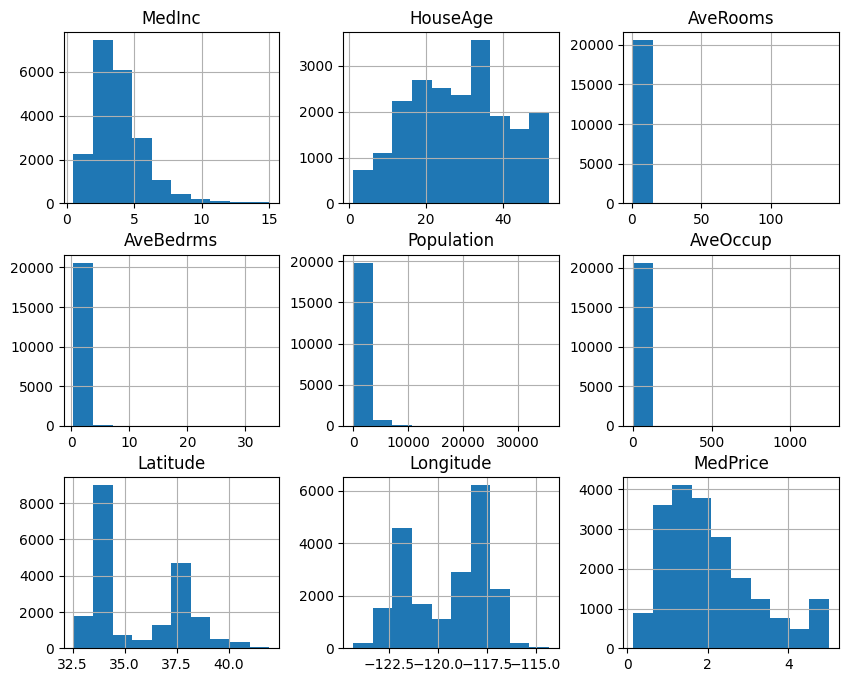

In [37]:
df.hist(figsize=(10,8))
plt.show()

## Create correlation heat map

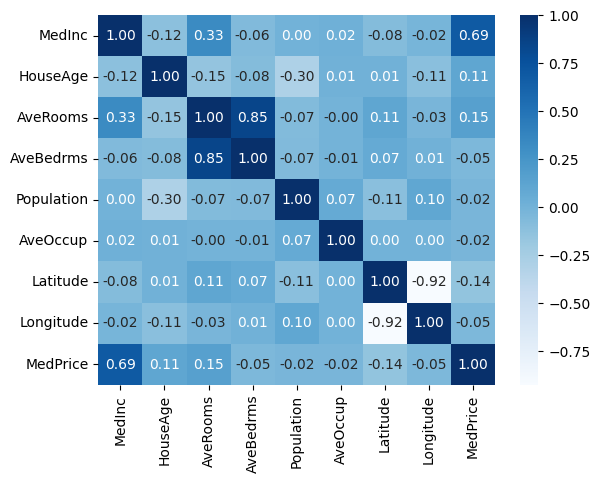

In [38]:
corr_matrix = df.corr()

sns.heatmap(corr_matrix, annot=True, cmap='Blues', fmt=".2f")
plt.show()

**Comment**: Median income per block group correlates with the median house price more than any other features.

## Visualize relationship between features and the target using scatter plots

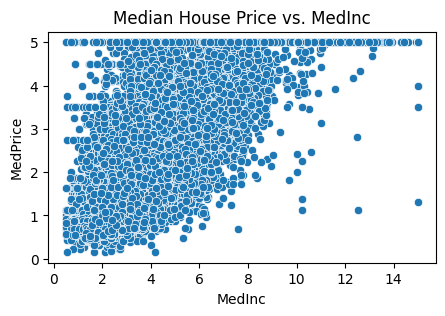

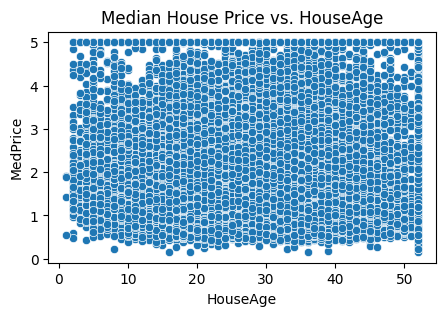

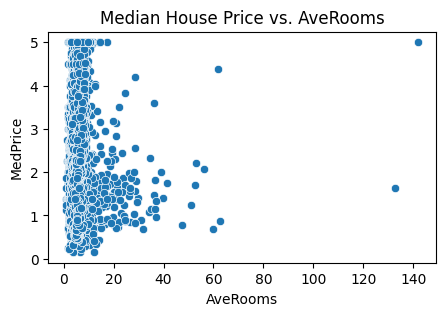

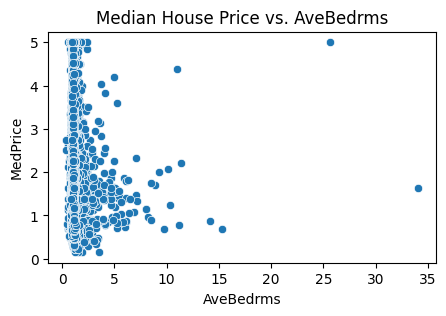

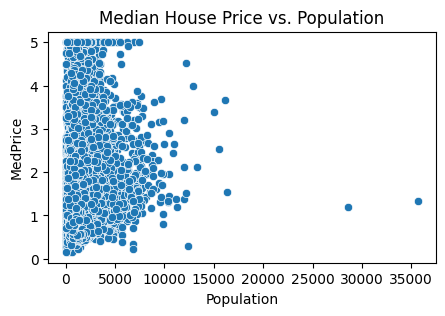

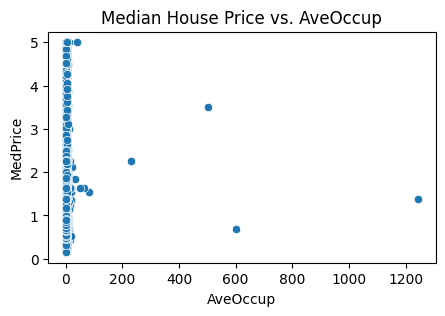

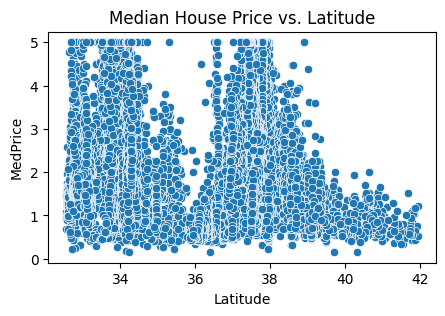

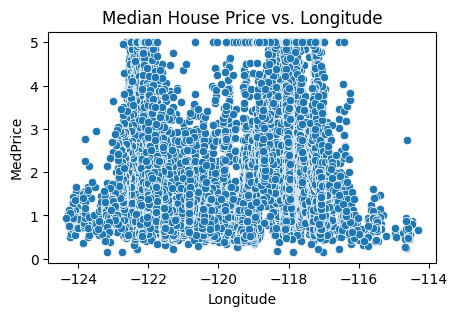

In [43]:
for feature in df.columns:
  if feature == 'MedPrice':
    break
  else:
    plt.figure(figsize=(5,3))
    sns.scatterplot(x=feature, y='MedPrice', data=df)
    plt.title(f"Median House Price vs. {feature}")
    plt.show()

## MODELING

### Separate features and the target

In [77]:
X = df.drop('MedPrice', axis=1)
y = df['MedPrice']

### Create training and testing sets

In [78]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=8)

print(len(X_train), ':', len(y_train))
print(len(X_test), ':', len(y_test))

16512 : 16512
4128 : 4128


### TRAINING OUR LINEAR REGRESSION MODEL

#### Scale the X_train features via Standardization

In [79]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [80]:
scaled_array = scaler.fit_transform(X_train)
X_train_scaled = pd.DataFrame(scaled_array, columns=X_train.columns)
X_train_scaled.tail()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
16507,-0.398526,0.666611,-0.216483,-0.077334,-0.714655,-0.049087,-0.778818,0.765227
16508,3.275423,-2.119327,1.752531,0.069481,1.361586,0.057887,-0.928611,0.969536
16509,-0.135672,-0.845755,0.294951,-0.080025,-0.637595,-0.004706,0.536558,-0.176588
16510,0.845774,-1.004952,0.494132,-0.060605,-0.120067,0.039230,0.770611,-1.133352
16511,-0.065756,1.064602,-0.487024,-0.177428,-0.772450,0.129120,-0.750731,0.680513


#### Create and train our LR model

In [81]:
lr = LinearRegression()
lr.fit(X_train_scaled, y_train)

LinearRegression()

In [82]:
# Print our model intercept and coefficients

print(f"Intercept: {lr.intercept_}, Coefficents: {lr.coef_}")

Intercept: 2.0724726786579404, Coefficents: [ 0.8248569   0.12470938 -0.2546139   0.29807624 -0.00387532 -0.03977732
 -0.89970044 -0.86630361]


### EVALUATING OUR LINEAR REGRESSION MODEL

Just like what we did for the training set, we need to scale our testing set features dataframe.

In [83]:
scaler = StandardScaler()

scaled_array = scaler.fit_transform(X_test)
X_test_scaled = pd.DataFrame(scaled_array, columns=X_test.columns)
X_test_scaled.tail()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
4123,1.508611,-0.765088,0.359226,-0.146180,-0.764614,-1.027019,-0.709543,0.716505
4124,2.578324,-0.054936,0.726976,-0.207936,0.083297,-0.577437,-0.718915,0.610989
4125,-0.967475,1.838803,1.361453,2.160457,-0.807604,-1.063275,1.310036,-1.725436
4126,-0.414595,-1.633051,-0.392391,-0.036472,0.018355,-0.333909,-0.479939,-0.444171
4127,-0.995353,0.102876,-1.482231,-0.427836,1.086705,0.285337,-0.737658,0.636112


#### R-squared metric

In [84]:
# Print the coefficient of determination (R-squared)

lr.score(X_test_scaled, y_test)

0.630456265810752

**NOTE**: R-squared is in the inclusive range of 0 to 1. The closer to 1, the better the predictive capacity of the model.

#### Root Mean Squared Error metric

In [85]:
from sklearn.metrics import mean_squared_error

In [93]:
# Use our model to predict X_test

y_pred = lr.predict(X_test_scaled)

# Print the first 20 predicted median house prices
y_pred[:20]

array([3.34092789, 0.68260372, 1.74437886, 1.0336822 , 1.64732798,
       3.04593093, 2.24555378, 2.35686368, 3.02676986, 1.35950683,
       1.54990034, 0.5666094 , 1.68361457, 3.02281984, 2.17350322,
       2.42836154, 1.90442422, 1.42206763, 2.12705774, 2.68754031])

In [90]:
# Calculate root mean squared error

mse = mean_squared_error(y_test, y_pred)

rmse = np.sqrt(mse)
rmse

0.69649870551854

**Comment**: Our RMSE tells us that our model's error, on average, is off by 69,600 USD. Note that the median and mean prices are 179,700 USD and 207,000 USD (as shown below).

In [98]:
# Sidenote: Check median and mean values for our target variable

df[['MedPrice']].describe()

,MedPrice
count,20640.000000
mean,2.068558
std,1.153956
min,0.149990
25%,1.196000
50%,1.797000
75%,2.647250
max,5.000010
